Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
# Replace missing values with mean of values from same state, if possible.
# Otherwise,replace with mean of given variable.
education_df4 = education_df.copy()

columns = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
           'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 
           'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']

for column in columns:
    education_df4[column] = round(education_df4[column].fillna(education_df4.groupby('STATE')[column].transform
    ('mean')), 0)
    education_df4[column] = round(education_df4[column].fillna(education_df4[column].mean()), 0)

In [5]:
# Check that missing values were filled in
education_df4.isnull().sum() / education_df4.isnull().count() * 100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable. 

In [6]:
# Derive the descriptive statistics
education_df4.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.160580e+05,9.092664e+06,7.664310e+05,4.216914e+06,4.109319e+06,9.197265e+06,4.763269e+06,2.680485e+06,4.292706e+05,...,63920.467828,63649.318365,53742.325067,5.142279e+05,2.446825e+05,7.947983e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.005701e+06,1.106024e+07,1.076284e+06,5.220854e+06,5.163003e+06,1.128030e+07,5.926444e+06,3.157737e+06,5.023493e+05,...,80027.565889,78646.032242,67566.266682,6.415325e+05,3.065506e+05,9.623289e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.870410e+05,2.422636e+06,2.081370e+05,1.319451e+06,8.765120e+05,2.419590e+06,1.302378e+06,7.349388e+05,1.201725e+05,...,13336.500000,12989.250000,10748.500000,1.072088e+05,4.992725e+04,1.769522e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,7.362480e+05,6.055223e+06,4.880955e+05,2.956335e+06,2.494314e+06,6.161170e+06,3.153096e+06,1.832252e+06,3.301260e+05,...,42767.000000,42993.500000,36585.000000,3.422030e+05,1.618015e+05,5.636270e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,9.631825e+05,9.684328e+06,7.732208e+05,4.444259e+06,4.118835e+06,9.780398e+06,5.152055e+06,2.872585e+06,4.792252e+05,...,75201.500000,75501.500000,67372.000000,6.068028e+05,2.894372e+05,9.107612e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [7]:
# Calculate total revenue
print(education_df4['TOTAL_REVENUE'].mean(),
    education_df4['FEDERAL_REVENUE'].mean() +
    education_df4['STATE_REVENUE'].mean() +
    education_df4['LOCAL_REVENUE'].mean()
)

# Calculate total expenses
print(education_df4['TOTAL_EXPENDITURE'].mean(), 
    education_df4['INSTRUCTION_EXPENDITURE'].mean() + 
    education_df4['SUPPORT_SERVICES_EXPENDITURE'].mean() + 
    education_df4['OTHER_EXPENDITURE'].mean() +
    education_df4['CAPITAL_OUTLAY_EXPENDITURE'].mean()
)

9092664.33847185 9092664.331769437
9197264.825067025 8775850.84517426


1. The mean of the revenue columns is approximately equal to the mean of the TOTAL_REVENUE column, but the mean of the expense columns is significantly lower than the mean of the TOTAL_EXPENDITURE column.
2. The mean TOTAL_EXPENDITURE is greater than the mean TOTAL_EXPENSES, suggesting a budget deficit on average.
3. There are a lot of missing values for the average math and reading score columns.
4. Average math scores are higher than average reading scores, but the average math scores have larger standard deviations (more variance).
5. The mean STATE_REVENUE and LOCAL_REVENUE are similar to each other and quite a bit larger than the mean FEDERAL_REVENUE.
6. The mean INSTRUCTION_EXPENDITURE makes up the largest chunk of the mean TOTAL_EXPENDITURE.

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

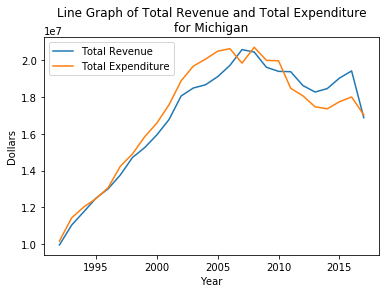

In [8]:
# Draw a line graph of TOTAL_REVENUE and TOTAL_EXPENDITURE
# versus years for the state of Michigan
x1 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'YEAR']
y1 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'TOTAL_REVENUE']
plt.plot(x1, y1, label='Total Revenue')


x2 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'YEAR']
y2 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'TOTAL_EXPENDITURE']
plt.plot(x2, y2, label='Total Expenditure')

plt.title('Line Graph of Total Revenue and Total Expenditure\nfor Michigan')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend()
plt.show()

Total expenditures and total revenue rose steadily from 1992 to 2005, when they both seemingly plateaued before decreasing. Total expenditures exceeded total revenue until 2010 (with the exception of 2006 or 2007), when a budget surplus lasted for five years until 2017. The budget surplus seems to align with the administration of Gov. Rick Snyder, suggesting that legislative changes may have played a role.

## 3. In your chosen state, which of the lessons are the students more successful, math or reading?

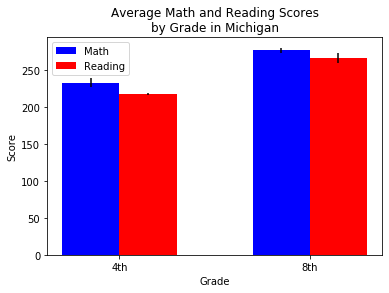

In [9]:
# Draw a bar graph of math and reading scores for
# 4th and 8th graders in Michigan
labels = ['4th', '8th']
width = 0.3
ind = np.arange(len(labels))

fig = plt.figure()
ax = fig.add_subplot(111)

math_4 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_MATH_4_SCORE'].mean()
math_4_sd = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_MATH_4_SCORE'].std()
math_8 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_MATH_8_SCORE'].mean()
math_8_sd = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_MATH_8_SCORE'].std()

reading_4 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_READING_4_SCORE'].mean()
reading_4_sd = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_READING_4_SCORE'].std()
reading_8 = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_READING_8_SCORE'].mean()
reading_8_sd = education_df4.loc[education_df4['STATE'] == 'MICHIGAN', 'AVG_READING_8_SCORE'].std()

math = [math_4, math_8]
math_sd = [math_4_sd, math_8_sd]
reading = [reading_4, reading_8]
reading_sd = [reading_4_sd, reading_8_sd]

plt.bar(ind - width / 2, math, yerr=math_sd, width=width, color='b', label='Math')
plt.bar(ind + width / 2, reading, yerr=reading_sd, width=width, color='r', label='Reading')

ax.set_xlabel('Grade')
ax.set_ylabel('Score')
plt.title('Average Math and Reading Scores\nby Grade in Michigan')

ax.set_xticks(ind)
ax.set_xticklabels(labels)

plt.legend()
plt.show()

Michigan students appear to be more successful in math than in reading.

## 4. What are the distributions of the math and reading scores in the sample?

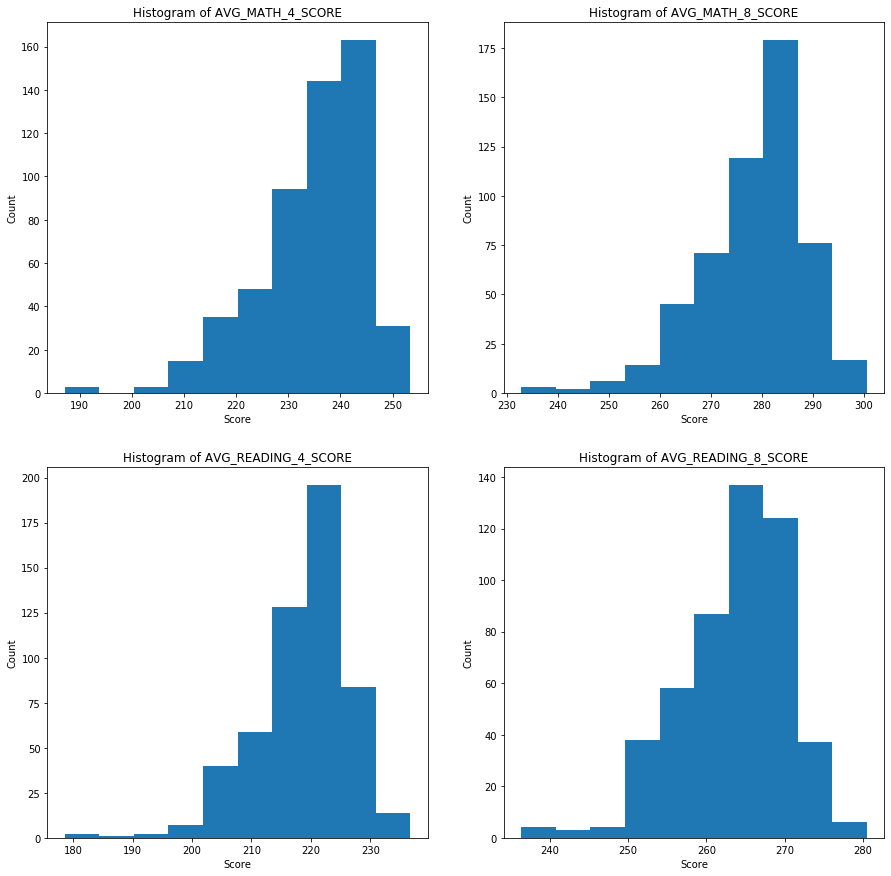

In [10]:
# Histograms of AVG_MATH_4_SCORE, AVG_MATH_8_SCORE,
# AVG_READING_4_SCORE, and AVG_READING_8_SCORE
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.hist(education_df4['AVG_MATH_4_SCORE'].dropna())
plt.title('Histogram of AVG_MATH_4_SCORE')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(education_df4['AVG_MATH_8_SCORE'].dropna())
plt.title('Histogram of AVG_MATH_8_SCORE')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(education_df4['AVG_READING_4_SCORE'].dropna())
plt.title('Histogram of AVG_READING_4_SCORE')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(education_df4['AVG_READING_8_SCORE'].dropna())
plt.title('Histogram of AVG_READING_8_SCORE')
plt.xlabel('Score')
plt.ylabel('Count')

plt.show()

All four distributions are slightly skewed to the left (means will be smaller than the medians).

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

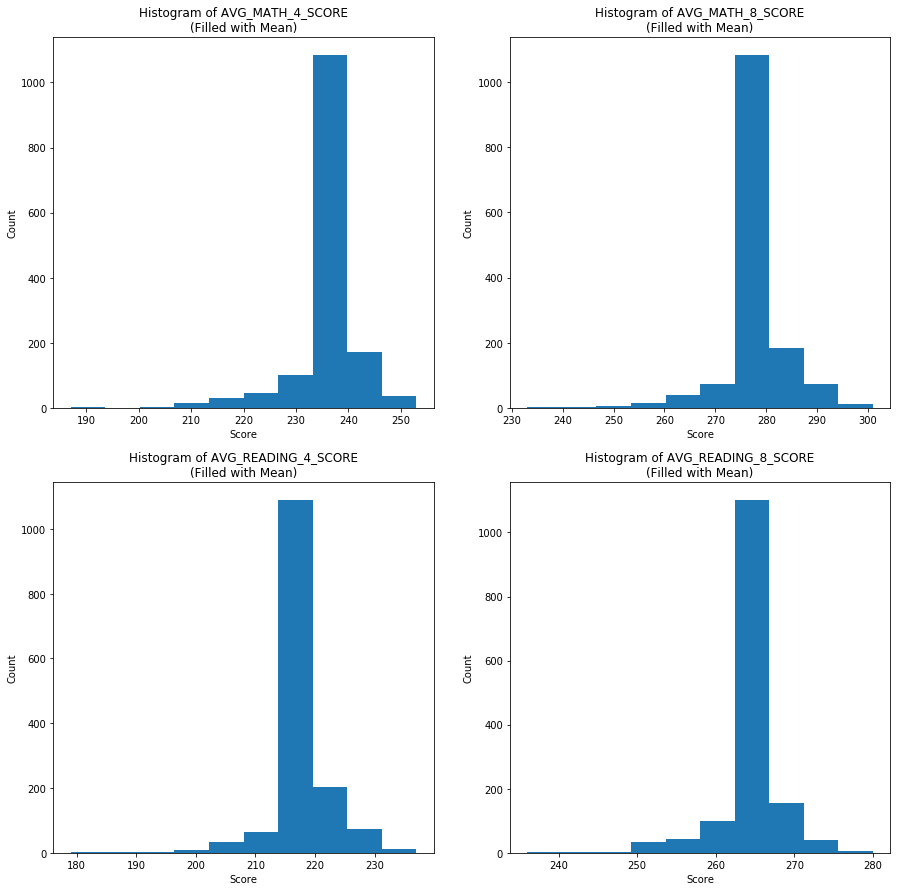

In [11]:
# Fill in missing values using mean and look at histograms
education_df5 = education_df4.copy()

columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for column in columns:
    education_df5[column] = round(education_df5[column].fillna(education_df5[column].mean()), 0)


# Histograms of AVG_MATH_4_SCORE, AVG_MATH_8_SCORE,
# AVG_READING_4_SCORE, and AVG_READING_8_SCORE
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.hist(education_df5['AVG_MATH_4_SCORE'])
plt.title('Histogram of AVG_MATH_4_SCORE\n(Filled with Mean)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(education_df5['AVG_MATH_8_SCORE'])
plt.title('Histogram of AVG_MATH_8_SCORE\n(Filled with Mean)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(education_df5['AVG_READING_4_SCORE'])
plt.title('Histogram of AVG_READING_4_SCORE\n(Filled with Mean)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(education_df5['AVG_READING_8_SCORE'])
plt.title('Histogram of AVG_READING_8_SCORE\n(Filled with Mean)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.show()


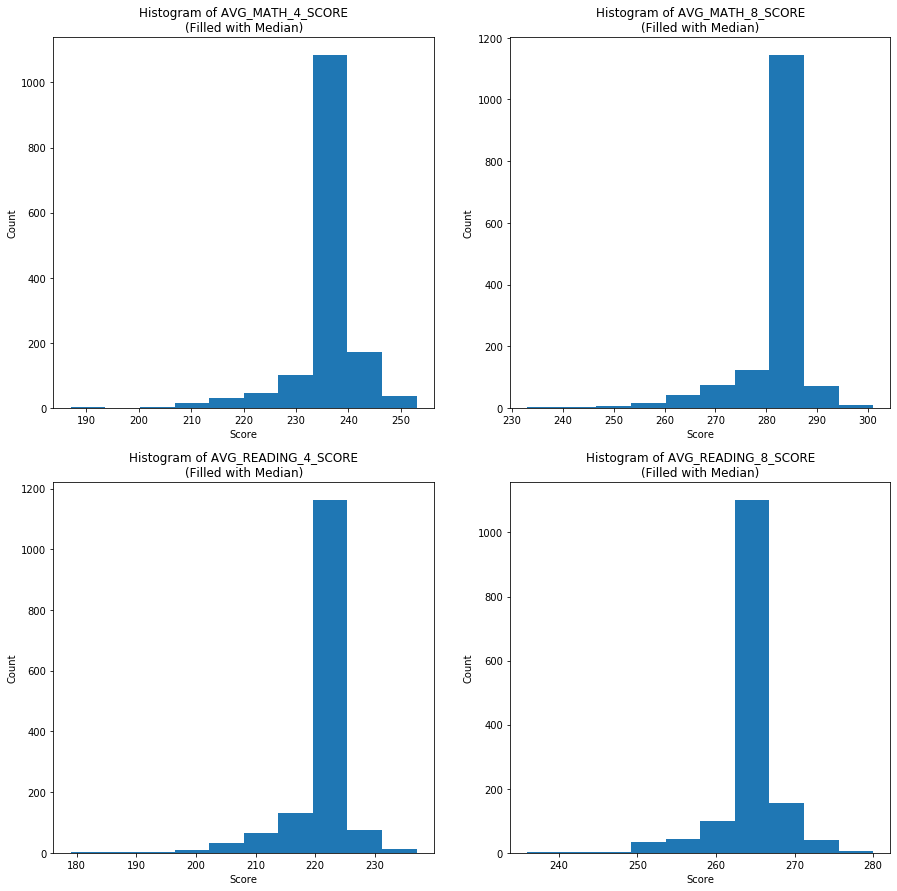

In [12]:
# Fill in missing values using median and look at histograms
education_df6 = education_df4.copy()

columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for column in columns:
    education_df6[column] = round(education_df6[column].fillna(education_df6[column].median()), 0)


# Histograms of AVG_MATH_4_SCORE, AVG_MATH_8_SCORE,
# AVG_READING_4_SCORE, and AVG_READING_8_SCORE
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.hist(education_df6['AVG_MATH_4_SCORE'])
plt.title('Histogram of AVG_MATH_4_SCORE\n(Filled with Median)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(education_df6['AVG_MATH_8_SCORE'])
plt.title('Histogram of AVG_MATH_8_SCORE\n(Filled with Median)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(education_df6['AVG_READING_4_SCORE'])
plt.title('Histogram of AVG_READING_4_SCORE\n(Filled with Median)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(education_df6['AVG_READING_8_SCORE'])
plt.title('Histogram of AVG_READING_8_SCORE\n(Filled with Median)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.show()

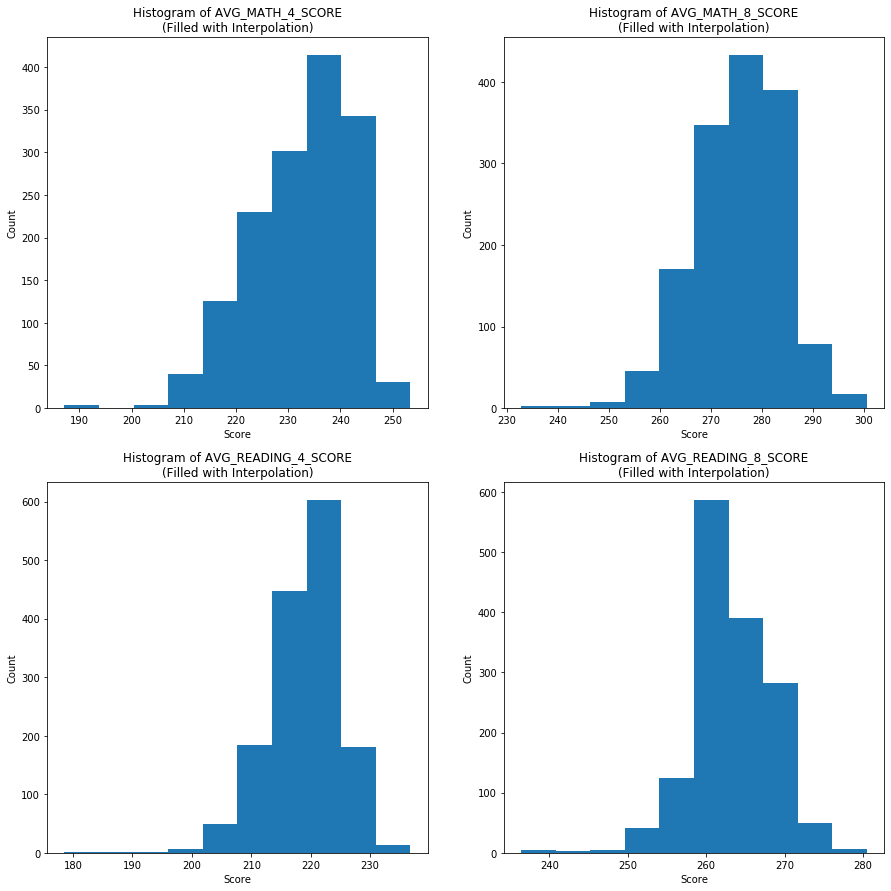

In [13]:
# Fill in missing values using linear interpolation and look at histograms
education_df7 = education_df4.copy()

columns = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for column in columns:
    education_df7[column] = education_df7[column].interpolate()

# Histograms of AVG_MATH_4_SCORE, AVG_MATH_8_SCORE,
# AVG_READING_4_SCORE, and AVG_READING_8_SCORE
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.hist(education_df7['AVG_MATH_4_SCORE'])
plt.title('Histogram of AVG_MATH_4_SCORE\n(Filled with Interpolation)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(education_df7['AVG_MATH_8_SCORE'])
plt.title('Histogram of AVG_MATH_8_SCORE\n(Filled with Interpolation)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(education_df7['AVG_READING_4_SCORE'])
plt.title('Histogram of AVG_READING_4_SCORE\n(Filled with Interpolation)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
plt.hist(education_df7['AVG_READING_8_SCORE'])
plt.title('Histogram of AVG_READING_8_SCORE\n(Filled with Interpolation)')
plt.xlabel('Score')
plt.ylabel('Count')

plt.show()

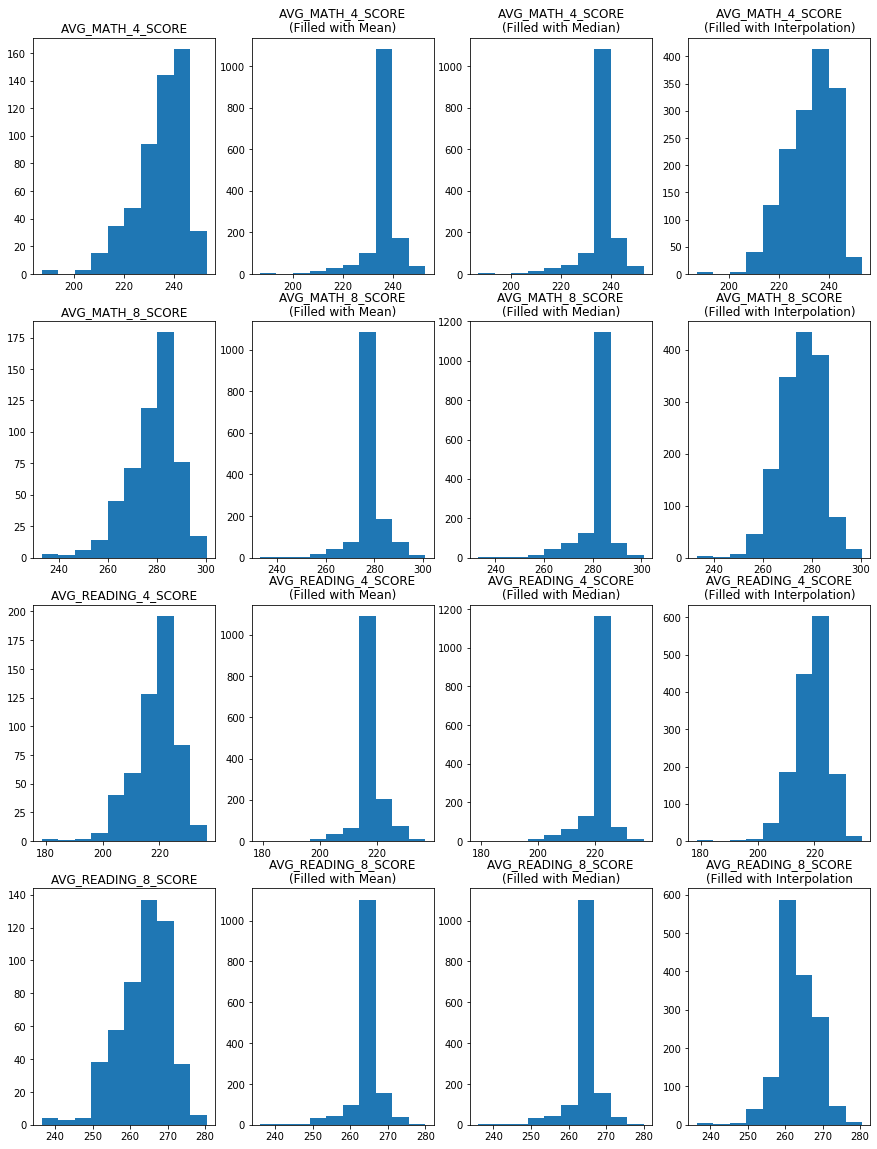

In [16]:
# Plot histograms for all data frames
plt.figure(figsize=(15, 20))

plt.subplot(4, 4, 1)
plt.hist(education_df4['AVG_MATH_4_SCORE'].dropna())
plt.title('AVG_MATH_4_SCORE')

plt.subplot(4, 4, 5)
plt.hist(education_df4['AVG_MATH_8_SCORE'].dropna())
plt.title('AVG_MATH_8_SCORE')

plt.subplot(4, 4, 9)
plt.hist(education_df4['AVG_READING_4_SCORE'].dropna())
plt.title('AVG_READING_4_SCORE')

plt.subplot(4, 4, 13)
plt.hist(education_df4['AVG_READING_8_SCORE'].dropna())
plt.title('AVG_READING_8_SCORE')

plt.subplot(4, 4, 2)
plt.hist(education_df5['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE\n(Filled with Mean)')

plt.subplot(4, 4, 6)
plt.hist(education_df5['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE\n(Filled with Mean)')

plt.subplot(4, 4, 10)
plt.hist(education_df5['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE\n(Filled with Mean)')

plt.subplot(4, 4, 14)
plt.hist(education_df5['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE\n(Filled with Mean)')

plt.subplot(4, 4, 3)
plt.hist(education_df6['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE\n(Filled with Median)')

plt.subplot(4, 4, 7)
plt.hist(education_df6['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE\n(Filled with Median)')

plt.subplot(4, 4, 11)
plt.hist(education_df6['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE\n(Filled with Median)')

plt.subplot(4, 4, 15)
plt.hist(education_df6['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE\n(Filled with Median)')

plt.subplot(4, 4, 4)
plt.hist(education_df7['AVG_MATH_4_SCORE'])
plt.title('AVG_MATH_4_SCORE\n(Filled with Interpolation)')

plt.subplot(4, 4, 8)
plt.hist(education_df7['AVG_MATH_8_SCORE'])
plt.title('AVG_MATH_8_SCORE\n(Filled with Interpolation)')

plt.subplot(4, 4, 12)
plt.hist(education_df7['AVG_READING_4_SCORE'])
plt.title('AVG_READING_4_SCORE\n(Filled with Interpolation)')

plt.subplot(4, 4, 16)
plt.hist(education_df7['AVG_READING_8_SCORE'])
plt.title('AVG_READING_8_SCORE\n(Filled with Interpolation')


plt.show()

Interpolation appears to have the least effect on the distribution while increasing the overall counts. Mean and median significantly affect the mode and dwarf the rest of the distribution.